In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# import scipy.stats
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv(r'dm_office_sales.csv')       

In [3]:
df

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802
...,...,...,...,...,...,...
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354


In [4]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [5]:
X.shape

(1000, 5)

In [6]:
y.shape

(1000,)

In [7]:
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
ohe_encoder.fit(X_train[['division','level of education']])

OneHotEncoder(drop='first', sparse_output=False)

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train[['training level', 'work experience', 'salary']])

StandardScaler()

In [12]:
encoded_xtrain_data = ohe_encoder.transform(X_train[['division','level of education']])

In [13]:
encoded_xtrain_data.shape

(700, 8)

In [14]:
scaled_xtrain_data = scaler.transform(X_train[['training level', 'work experience', 'salary']])

In [15]:
scaled_xtrain_data.shape

(700, 3)

In [16]:
X_train_transformed = np.hstack((encoded_xtrain_data, scaled_xtrain_data))

In [17]:
X_train_transformed

array([[ 0.        ,  0.        ,  1.        , ..., -0.244958  ,
        -0.38139299, -0.31149086],
       [ 0.        ,  1.        ,  0.        , ..., -0.244958  ,
        -0.04042863,  0.1588346 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.84029897,
        -0.04042863, -0.11133017],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.84029897,
         0.64150009,  0.5426401 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.244958  ,
         0.30053573,  1.28000101],
       [ 0.        ,  0.        ,  0.        , ..., -0.244958  ,
        -0.04042863, -0.00186186]])

In [18]:
encoded_xtest_data = ohe_encoder.transform(X_test[['division','level of education']])
scaled_xtest_data = scaler.transform(X_test[['training level', 'work experience', 'salary']])

In [19]:
X_test_transformed = np.hstack((encoded_xtest_data, scaled_xtest_data))

In [20]:
X_test_transformed

array([[ 0.        ,  1.        ,  0.        , ...,  1.92555594,
         0.64150009,  0.54014824],
       [ 0.        ,  1.        ,  0.        , ...,  0.84029897,
         0.30053573,  0.00532399],
       [ 1.        ,  0.        ,  0.        , ...,  0.84029897,
        -0.04042863,  0.87145068],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.244958  ,
         0.64150009,  0.56877573],
       [ 0.        ,  0.        ,  0.        , ..., -0.244958  ,
         1.66439318,  0.72651673],
       [ 0.        ,  0.        ,  0.        , ..., -0.244958  ,
        -0.04042863,  0.12829474]])

In [21]:
#new, since first one is already fitted on x
scaler2 = StandardScaler()

In [22]:
y_train.shape

(700,)

In [23]:
#reshape to convert from 1D to 2D
scaled_ytrain = scaler2.fit_transform(y_train.values.reshape(-1, 1))

In [24]:
scaled_ytrain

array([[-7.30033823e-01],
       [-8.79995154e-03],
       [ 5.53977059e-01],
       [ 3.75939737e-01],
       [-2.03355039e+00],
       [ 3.52508609e-01],
       [ 4.51252076e-01],
       [ 4.56084103e-01],
       [-6.62600400e-01],
       [-8.81124986e-02],
       [-5.71343305e-01],
       [-1.35039327e+00],
       [ 2.60103708e+00],
       [ 7.66399350e-01],
       [-1.24983580e-01],
       [-6.81021093e-02],
       [-1.75986322e+00],
       [ 1.00204715e+00],
       [-1.45281918e+00],
       [ 3.53732972e-01],
       [-1.48611063e+00],
       [-2.09212354e+00],
       [-1.01283362e+00],
       [ 3.15740336e-01],
       [-6.38318760e-01],
       [ 2.17417452e-01],
       [ 3.30647656e-01],
       [ 1.50688656e+00],
       [ 4.15399739e-01],
       [-1.00129096e+00],
       [ 4.82404061e-02],
       [-2.53308029e-01],
       [ 3.14899171e-01],
       [-1.29114719e+00],
       [-1.25800528e+00],
       [-1.16864548e+00],
       [-1.25834092e-01],
       [-1.35638424e+00],
       [-1.5

In [25]:
y_test_transf = scaler2.transform(y_test.values.reshape(-1,1))

In [26]:
y_test_transf

array([[ 1.08002318],
       [ 0.3779305 ],
       [ 0.65459913],
       [-1.51083155],
       [-1.74704947],
       [-0.25860737],
       [ 1.58978808],
       [ 0.20466912],
       [ 0.13803013],
       [ 0.48356217],
       [-0.99118763],
       [ 0.24854057],
       [ 2.5524551 ],
       [ 0.00685507],
       [ 0.27770097],
       [-0.74853011],
       [ 0.04213728],
       [ 0.72655615],
       [ 0.98155076],
       [-0.402699  ],
       [ 1.01873027],
       [-0.81561772],
       [-2.10203995],
       [ 0.89895766],
       [-0.23596133],
       [-0.31609635],
       [ 1.1830379 ],
       [ 1.83687573],
       [ 1.67843756],
       [ 0.24151217],
       [ 2.202306  ],
       [ 0.51710598],
       [ 0.33660124],
       [-1.94959274],
       [-0.53593959],
       [-1.38940465],
       [-0.12236662],
       [ 0.7312106 ],
       [-0.23501736],
       [ 0.12847823],
       [ 0.7330892 ],
       [-1.57564801],
       [ 2.53047265],
       [-0.5033491 ],
       [-0.77242856],
       [-0

In [27]:
model = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', random_state=45, max_iter=1000, learning_rate_init=0.0001, batch_size=8, early_stopping=True)

In [28]:
model.hidden_layer_sizes

(10, 10)

In [29]:
X_train_transformed.shape

(700, 11)

In [30]:
scaled_ytrain.shape

(700, 1)

In [31]:
model.fit(X_train_transformed, scaled_ytrain)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(batch_size=8, early_stopping=True, hidden_layer_sizes=(10, 10),
             learning_rate_init=0.0001, max_iter=1000, random_state=45)

In [32]:
y_pred = model.predict(X_test_transformed)

In [33]:
y_pred.shape

(300,)

In [34]:
y_pred

array([ 1.44249151,  0.75681427,  0.40259219, -1.34265202, -1.19917188,
       -0.39242397,  1.73350491, -0.01995866, -0.12281541,  0.8409358 ,
       -1.08191603,  0.07808993,  2.24665532,  0.25887964,  0.33296307,
       -0.733697  ,  0.26387699,  0.80078176,  0.92056316, -0.80674404,
        0.98219936, -0.48518201, -1.81465064,  0.68635256, -0.07182039,
       -0.21000918,  1.08459286,  1.31361874,  1.52186056, -0.07421063,
        2.15137051,  0.39485752,  0.30444409, -2.14863925, -0.58228377,
       -1.55695973, -0.13368125,  0.89638694, -0.32146597, -0.37718064,
        0.60234939, -1.35899365,  1.76929443, -0.39399217, -0.97852294,
       -0.10115292,  0.93454726,  0.43628266,  0.48648574, -1.21807165,
       -1.01412731, -1.89887738,  1.06329101,  1.03657492,  3.43433348,
       -0.78744424,  0.03724784,  1.08092154, -0.82563158, -0.19782111,
        0.99061638, -0.46556886, -0.94813194, -0.73709807, -1.03265416,
       -0.71929119,  0.89320752, -2.38810429,  0.3910715 ,  0.23

In [35]:
y_pred_inverse_tranf = scaler2.inverse_transform(y_pred.reshape(-1,1))

In [36]:
y_pred_inverse_tranf

array([[491263.08924689],
       [417899.44950091],
       [379999.66374708],
       [193268.27104338],
       [208619.84566772],
       [294937.37047682],
       [522399.89917992],
       [334789.08008233],
       [323783.98257135],
       [426899.98457763],
       [221165.56693848],
       [345279.7320227 ],
       [577304.12969488],
       [364623.22284521],
       [372549.73660685],
       [258423.06004823],
       [365157.91149756],
       [422603.72577811],
       [435419.66739582],
       [250607.43494592],
       [442014.39664043],
       [285012.77817639],
       [142767.05198857],
       [410360.4396497 ],
       [329240.16500159],
       [314454.73539812],
       [452969.93051419],
       [477474.42169992],
       [499755.13421067],
       [328984.42231067],
       [567109.18614836],
       [379172.09692356],
       [369498.36451042],
       [107032.13431314],
       [274623.43104255],
       [170338.54132303],
       [322621.39822871],
       [432832.94710319],
       [3025

In [37]:
#performance matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [38]:
mae = mean_absolute_error(y_test_transf, y_pred)

In [39]:
mae

0.21741499728593094

In [40]:
mse = mean_squared_error(y_test_transf, y_pred)

In [41]:
mse

0.07329321425646756

In [42]:
rmse = root_mean_squared_error(y_test_transf, y_pred)

In [43]:
rmse

0.27072719526576483

In [44]:
r2 = r2_score(y_test_transf, y_pred)

In [45]:
r2

0.9326852493554952

In [46]:
plt.figure(figsize=(8,8), dpi = 200)

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

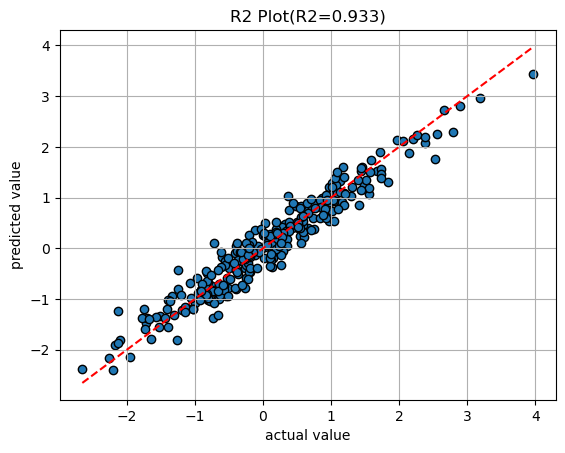

In [47]:
plt.scatter(x=y_test_transf, y=y_pred, edgecolor='k')
sb.lineplot(x=y_test_transf.flatten(), y=y_test_transf.flatten(), color='red', linestyle = 'dashed')
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title(f"R2 Plot(R2={r2:.3f})")
plt.grid(True)

In [48]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
scoring = {'MAE':make_scorer(mean_absolute_error, greater_is_better=False), 'MSE': make_scorer(mean_squared_error, greater_is_better=False)}
scores = cross_validate(model, X_train_transformed, scaled_ytrain.ravel(), scoring = scoring, cv= 10, return_estimator=True, return_train_score=True, verbose=1)
#returns 10 model (trained on ) - validation=9 times


In [49]:
scores_df = pd.DataFrame(scores)
scores_df.head(10)

,fit_time,score_time,estimator,test_MAE,train_MAE,test_MSE,train_MSE
0,4.737812,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.172781,-0.179085,-0.059699,-0.053212
1,3.611654,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.214241,-0.180722,-0.069916,-0.055098
2,4.242640,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.188048,-0.175433,-0.059821,-0.051989
3,3.519079,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.190593,-0.178672,-0.056754,-0.053515
4,4.050274,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.185736,-0.177039,-0.056169,-0.053235
5,2.567788,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.185006,-0.184135,-0.062542,-0.056585
6,3.627849,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.187357,-0.181736,-0.059944,-0.056181
7,2.436273,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.199090,-0.191115,-0.066743,-0.060498
8,2.419881,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.218208,-0.189733,-0.074458,-0.060426
9,3.234908,0.0,"MLPRegressor(batch_size=8, early_stopping=True...",-0.243120,-0.171823,-0.092061,-0.050601


In [50]:
best_model_index = scores_df['test_MSE'].idxmax()

In [51]:
best_model_index

4

In [52]:
best_model = scores_df.iloc[best_model_index,2]

In [53]:
y_pred2 = best_model.predict(X_test_transformed)

In [54]:
y_pred2

array([ 1.39586844e+00,  7.65417502e-01,  4.85321758e-01, -1.29868259e+00,
       -1.17625498e+00, -4.37490880e-01,  1.67581709e+00, -2.17592297e-02,
       -9.97267636e-02,  7.87568596e-01, -1.05106314e+00,  7.95515692e-02,
        2.25197141e+00,  2.51387222e-01,  3.04659610e-01, -7.02710592e-01,
        2.32109395e-01,  7.74428065e-01,  9.51602512e-01, -8.06172334e-01,
        9.60993387e-01, -5.16686271e-01, -1.75151021e+00,  7.21277019e-01,
       -5.14825227e-02, -1.69118624e-01,  1.02014166e+00,  1.33783738e+00,
        1.49679777e+00, -7.99615824e-02,  2.08901530e+00,  3.62353383e-01,
        2.88092521e-01, -2.12201317e+00, -5.89047519e-01, -1.60138573e+00,
       -1.02738084e-01,  8.63765189e-01, -3.41836179e-01, -3.44945494e-01,
        5.88528202e-01, -1.27957421e+00,  1.81250125e+00, -3.75709610e-01,
       -9.89866699e-01, -1.60038342e-01,  9.31965631e-01,  4.57440776e-01,
        4.55978880e-01, -1.19968088e+00, -1.03669255e+00, -1.90980051e+00,
        1.09769125e+00,  

In [55]:
y_pred2_inverse_transf = scaler2.inverse_transform(y_pred2.reshape(-1,1))

In [56]:
y_pred2_inverse_transf

array([[486274.6807172 ],
       [418819.94768034],
       [388851.26588373],
       [197972.75421486],
       [211071.82572422],
       [290115.46260981],
       [516227.62396737],
       [334596.42953927],
       [326254.33844061],
       [421189.99120887],
       [224466.65440415],
       [345436.11975459],
       [577872.9214084 ],
       [363821.57578683],
       [369521.42407796],
       [261738.43319098],
       [361758.95585453],
       [419784.02761967],
       [438740.70497886],
       [250668.60405964],
       [439745.47614794],
       [281641.99761943],
       [149522.72557281],
       [414097.16230718],
       [331416.2030375 ],
       [318829.796534  ],
       [446074.01091688],
       [480065.68044471],
       [497073.55596597],
       [328369.10255608],
       [560437.52685694],
       [375694.33587954],
       [367748.83805642],
       [109880.97606731],
       [273899.74785929],
       [165585.20733786],
       [325932.14400222],
       [429342.6014932 ],
       [3003

In [57]:
y_test

141    452481
481    377361
255    406963
990    175274
252    150000
        ...  
478    296565
971    431558
148    392213
957    466472
970    348726
Name: sales, Length: 300, dtype: int64

In [58]:
r2_2 = r2_score(y_test_transf, y_pred2)

In [59]:
r2_2

0.9331993694595084

In [60]:
plt.figure(figsize=(8,8), dpi = 200)

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

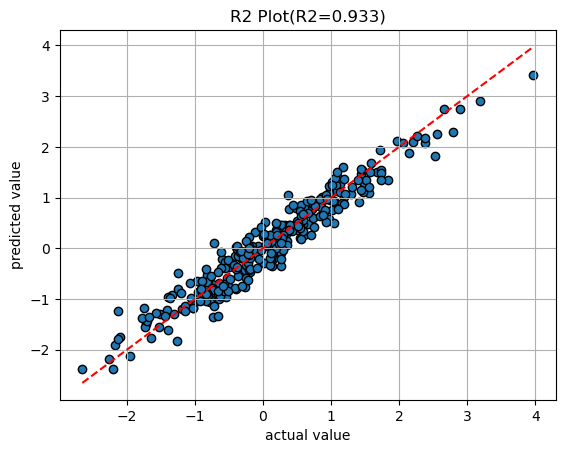

In [61]:
plt.scatter(x=y_test_transf, y=y_pred2, edgecolor='k')
sb.lineplot(x=y_test_transf.flatten(), y=y_test_transf.flatten(), color='red', linestyle = 'dashed')
plt.xlabel("actual value")
plt.ylabel("predicted value")



plt.title(f"R2 Plot(R2={r2_2:.3f})")
plt.grid(True)